### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Reading Data

In [2]:
df= pd.read_csv("E:\\My Courses\\fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### dealing with outliers ..

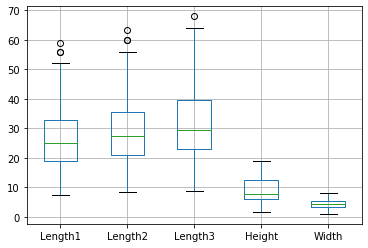

In [5]:
df.boxplot(column=['Length1' , 'Length2' , 'Length3','Height' , 'Width'])
plt.show()

In [6]:
#treat with outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Height     0
Length1    3
Length2    3
Length3    1
Species    0
Weight     3
Width      0
dtype: int64

In [7]:
new_df=df[['Length1' , 'Length2' , 'Length3','Height' , 'Width']]
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
condition = (new_df <= maximum) & (new_df >= minimum)
condition = condition.all(axis=1)
df=df[condition]

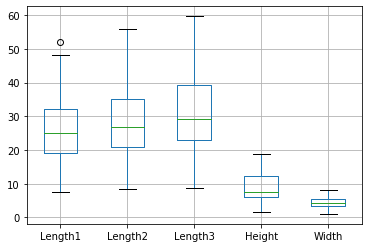

In [8]:
df.boxplot(column=['Length1' , 'Length2' , 'Length3','Height' , 'Width'])
plt.show()

In [11]:
new_y=df[[ 'Weight']]
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
condition = (new_df <= maximum) & (new_df >= minimum)
condition = condition.all(axis=1)
df=df[condition]

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


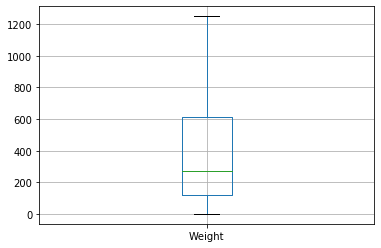

In [12]:
df.boxplot(column=['Weight'])
plt.show()

### EDA

In [9]:
# show the unique values of fish Species
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

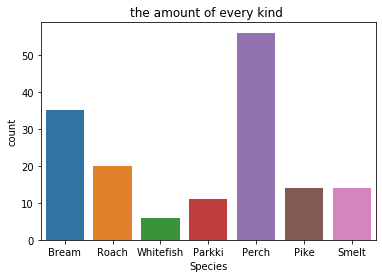

In [10]:
#show the amount of every kind
sns.countplot(df['Species'])
plt.title("the amount of every kind ")
plt.show()

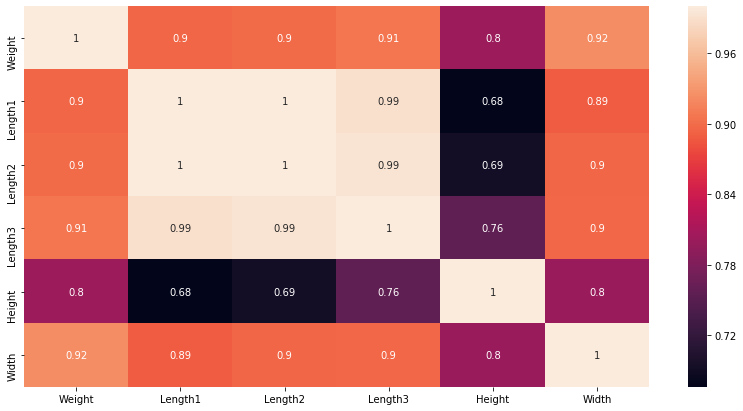

In [19]:
# Show the heatmap to know the corr btween the features and the importance of each one 
df_X=df[['Weight','Length1' , 'Length2' , 'Length3','Height' , 'Width']]
plt.figure(figsize=(14,7))
sns.heatmap(df_X.corr(), annot=True)

### ML

In [28]:
# we saw that there is a strong correlation betwen length1 ,length2 and length3 so that we take only one from them ..
X=df[['Length3' ,'Height' , 'Width']]
y= df[['Weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_pred.shape)

(124, 3)
(32, 3)
(124, 1)
(32, 1)


In [21]:
#applying and fitting linear regression..
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# predict the score ..
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.8965847793732105

### finally we get nearly 0.9 score .